In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import sys
from pathlib import Path

In [3]:
sys.path.append(str(Path().resolve().parent))
from path_manager import TRAIN_DATA_NB, TEST_DATA_NB

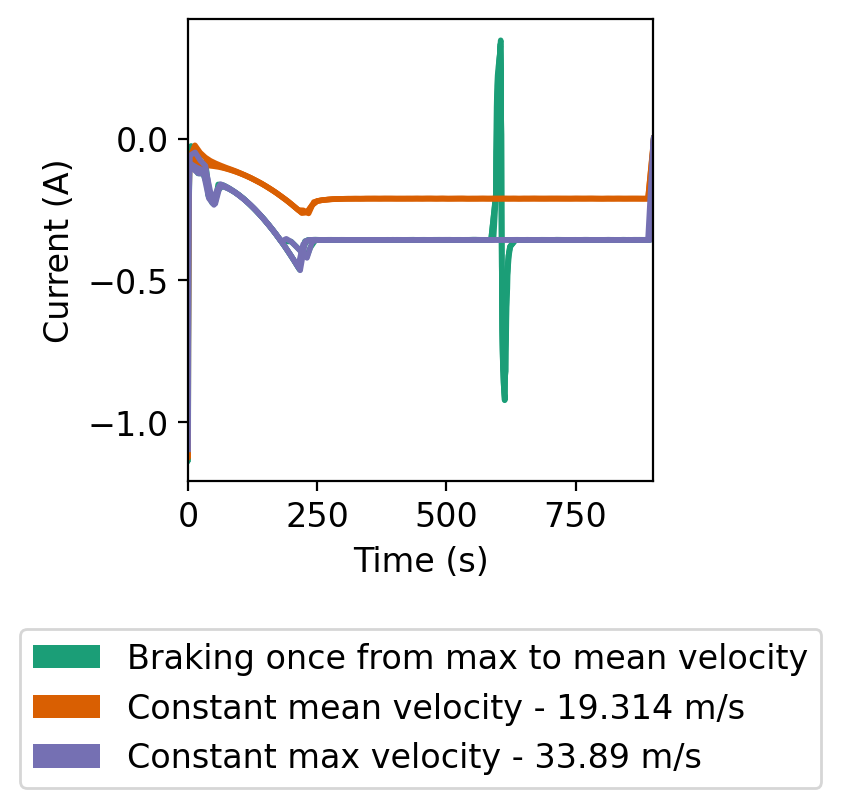

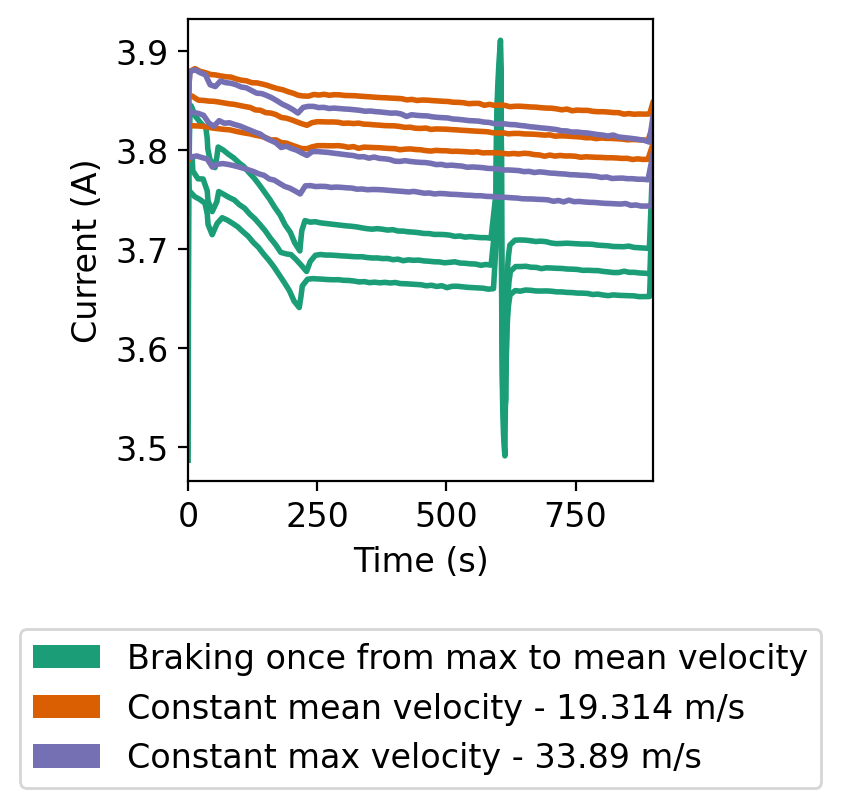

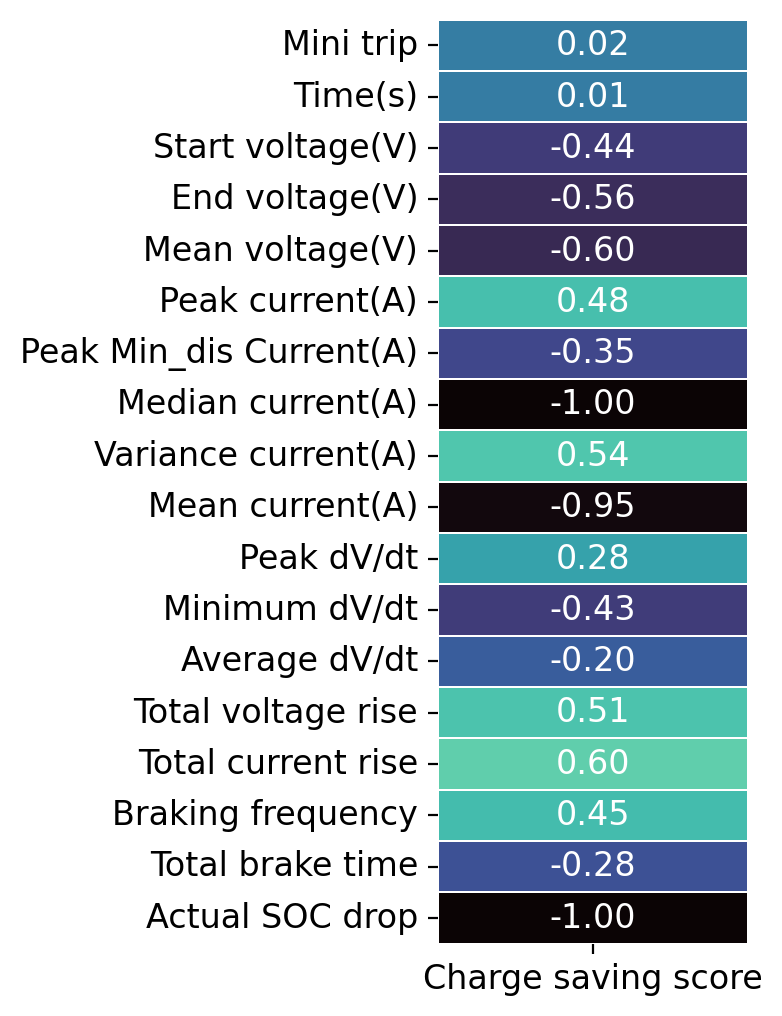

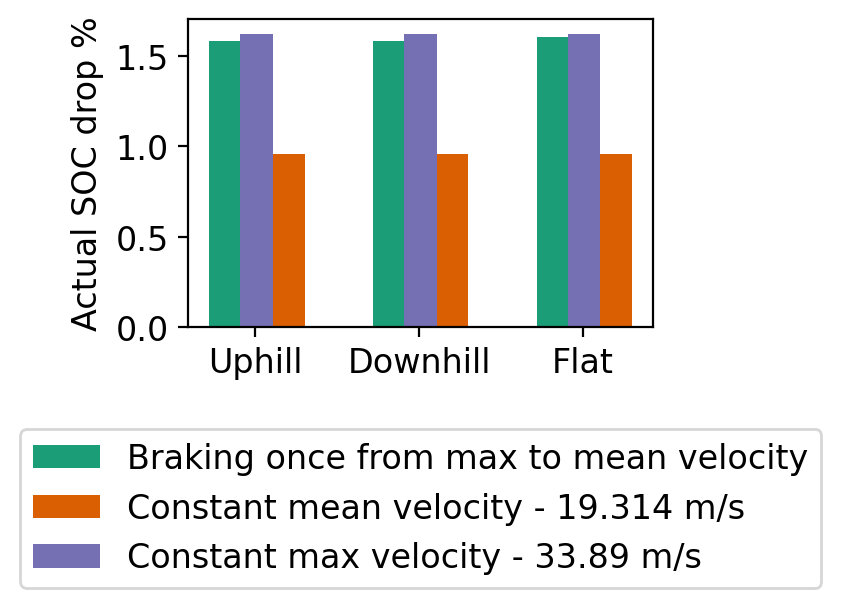

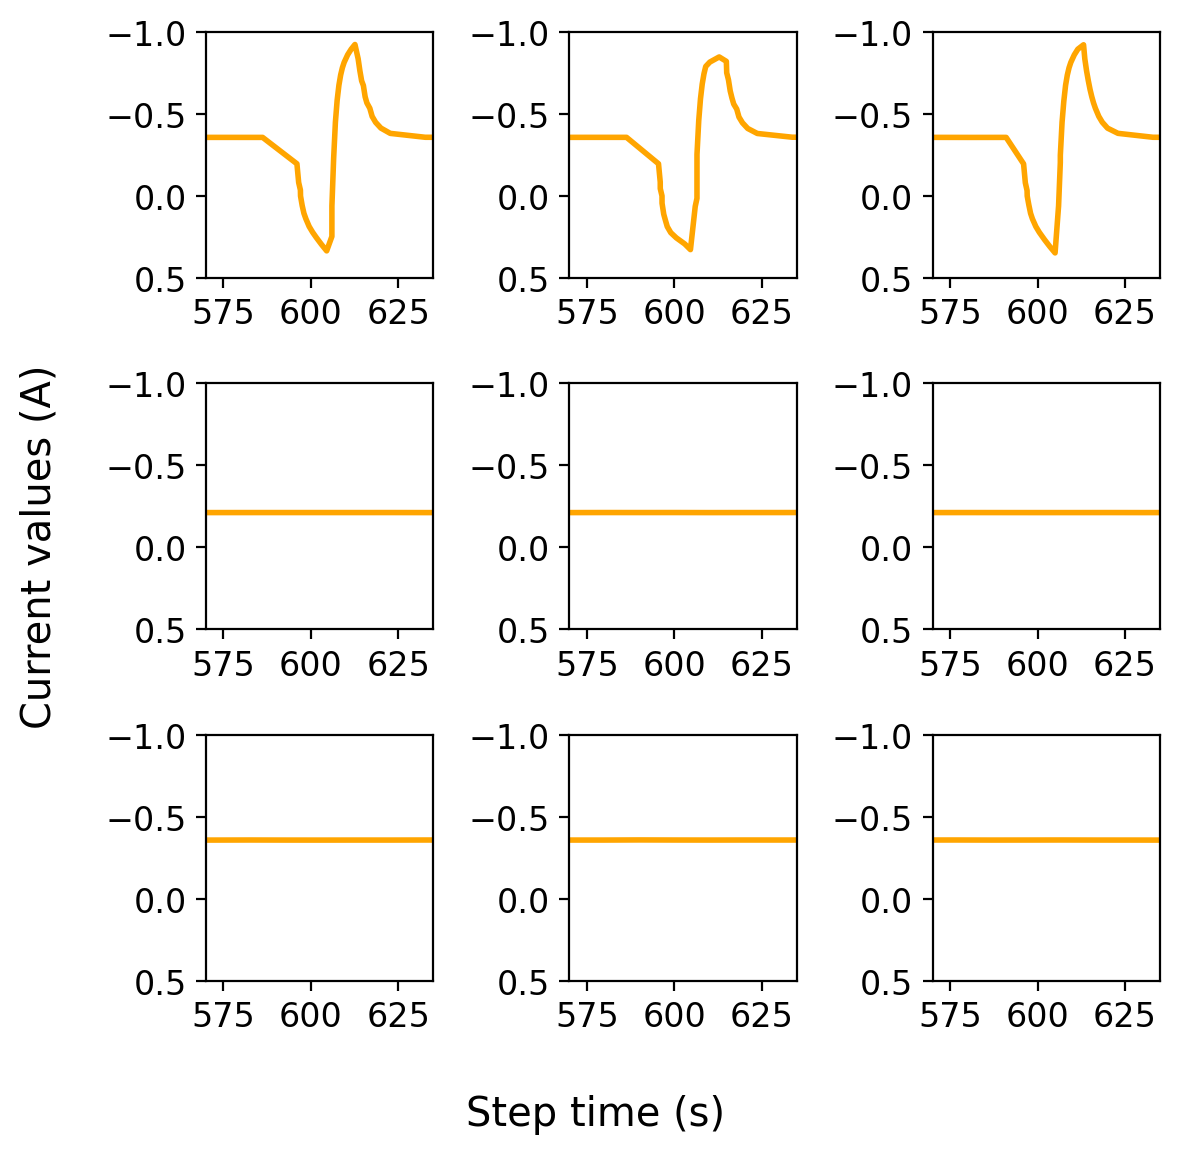

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_90501/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_90501/32172

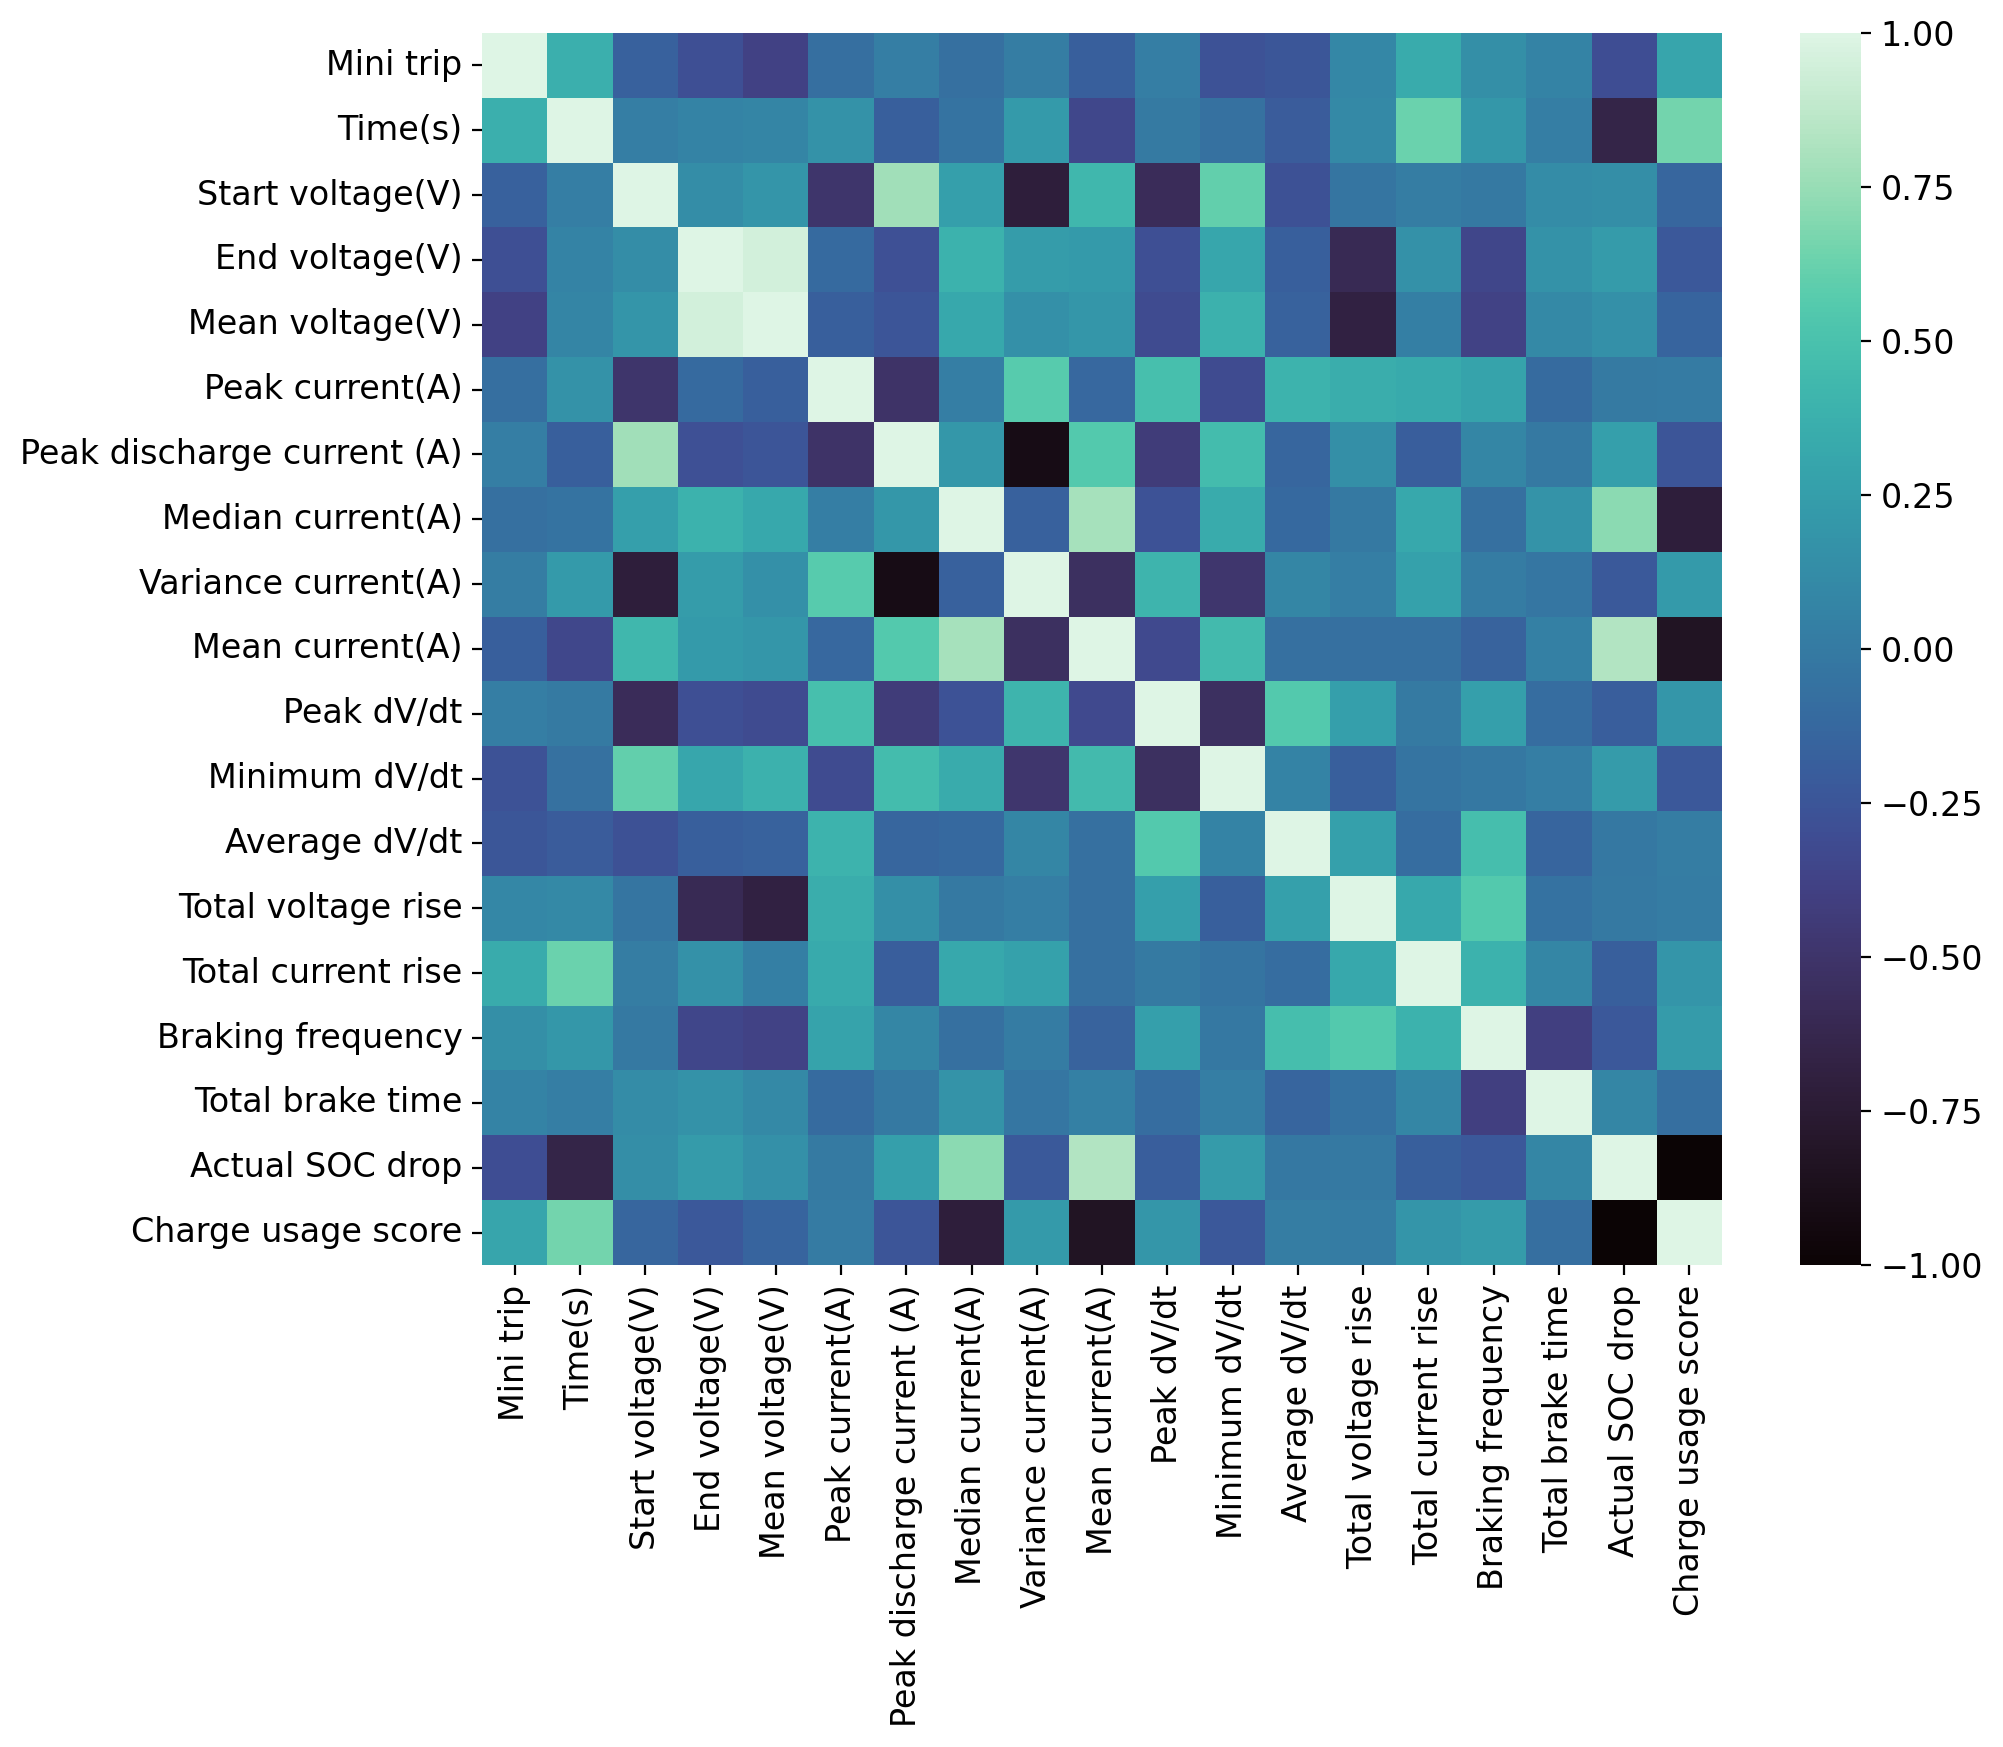

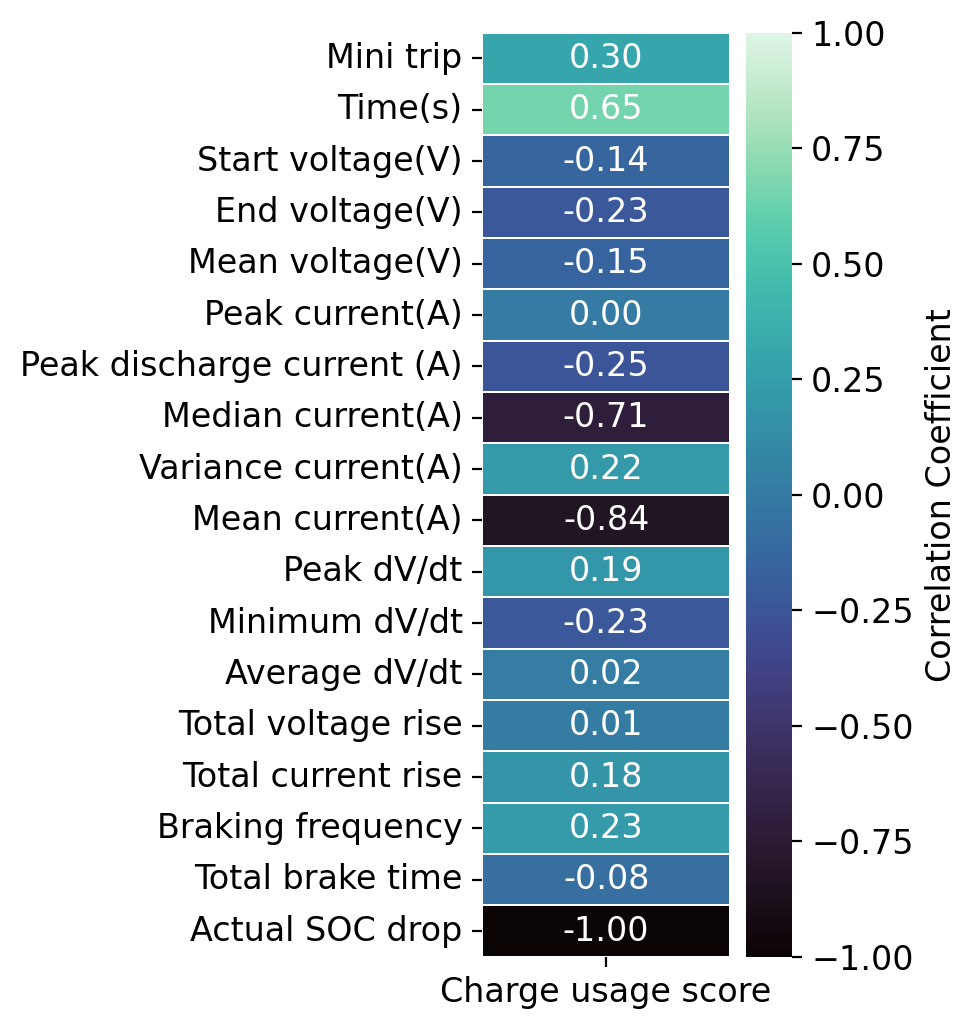

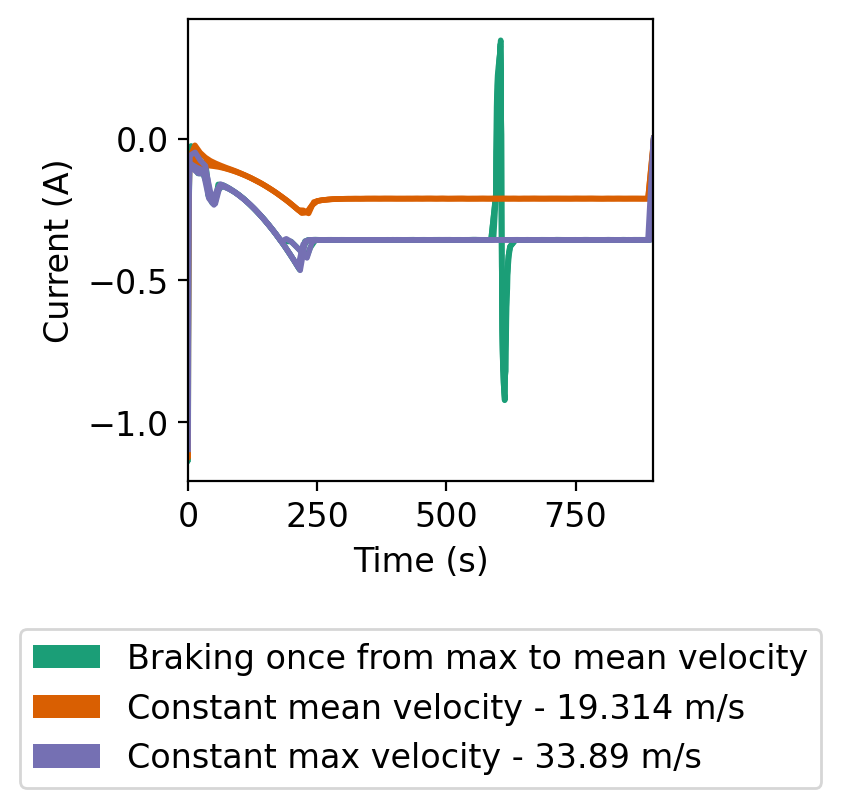

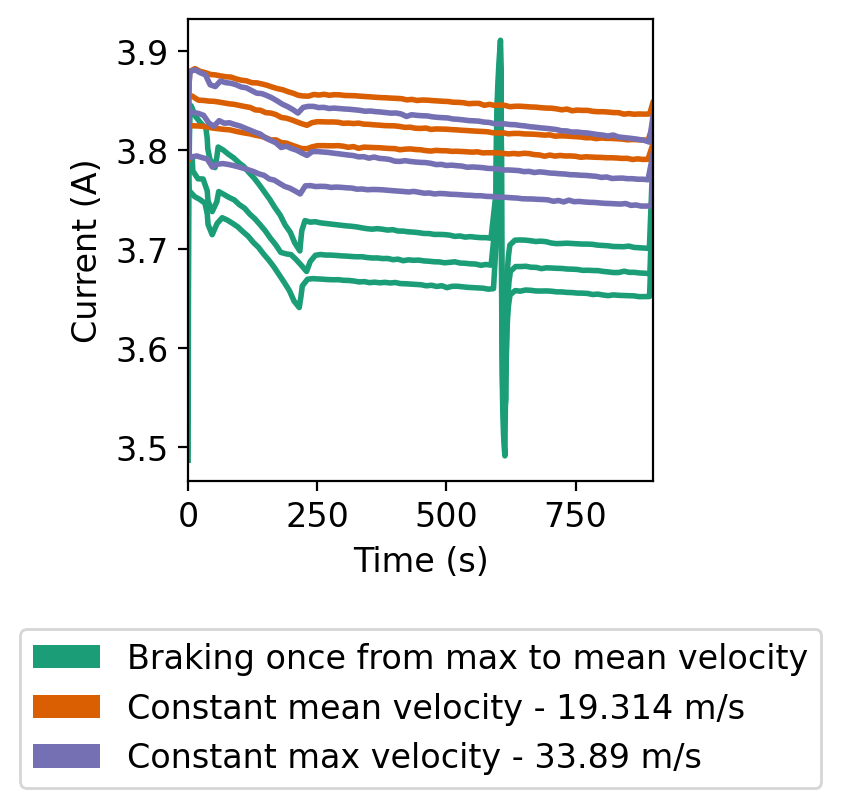

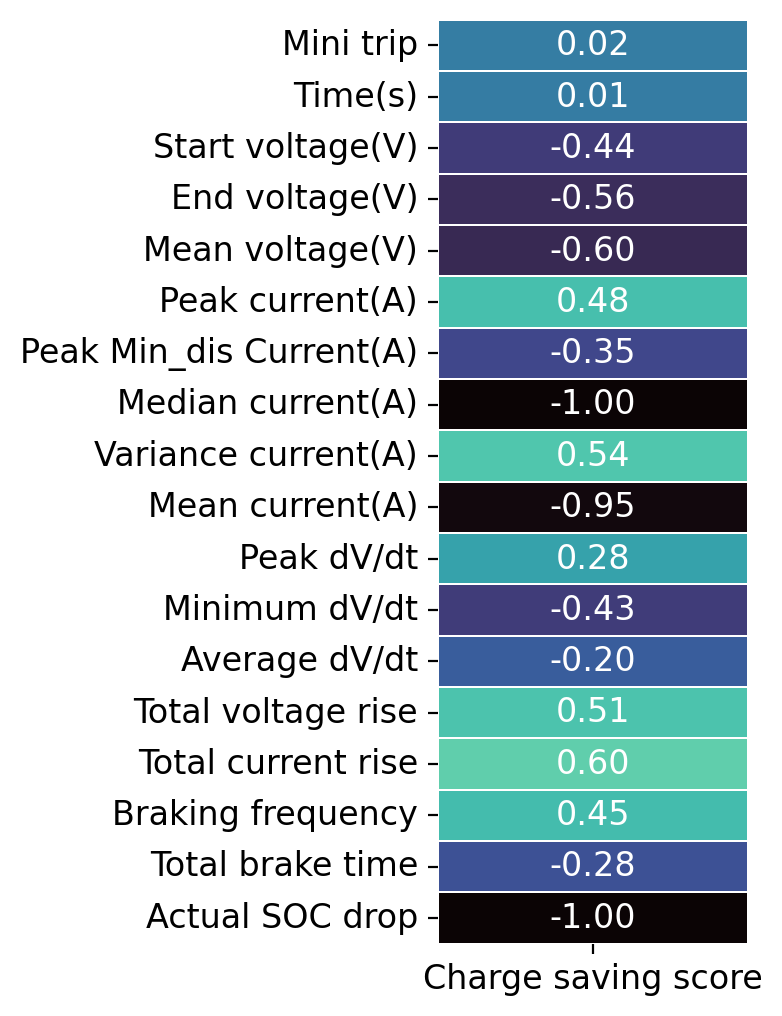

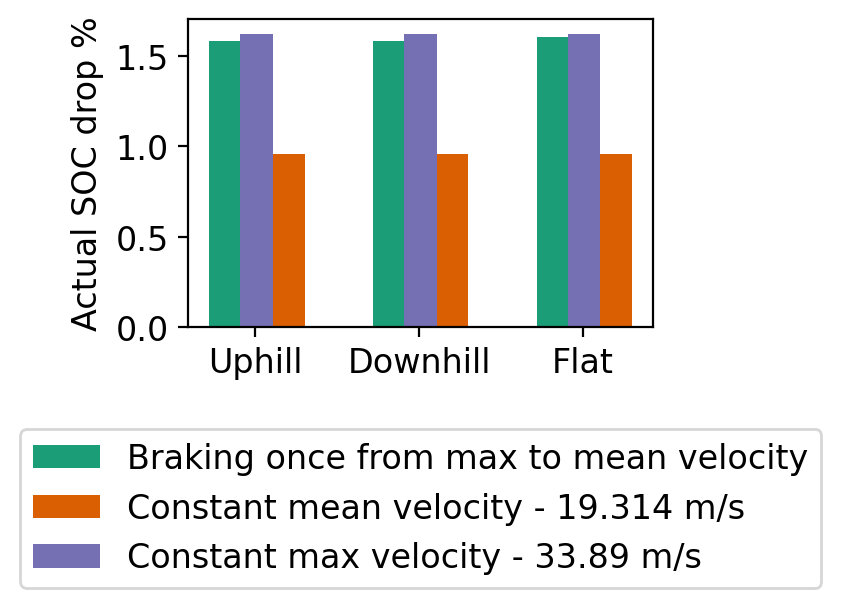

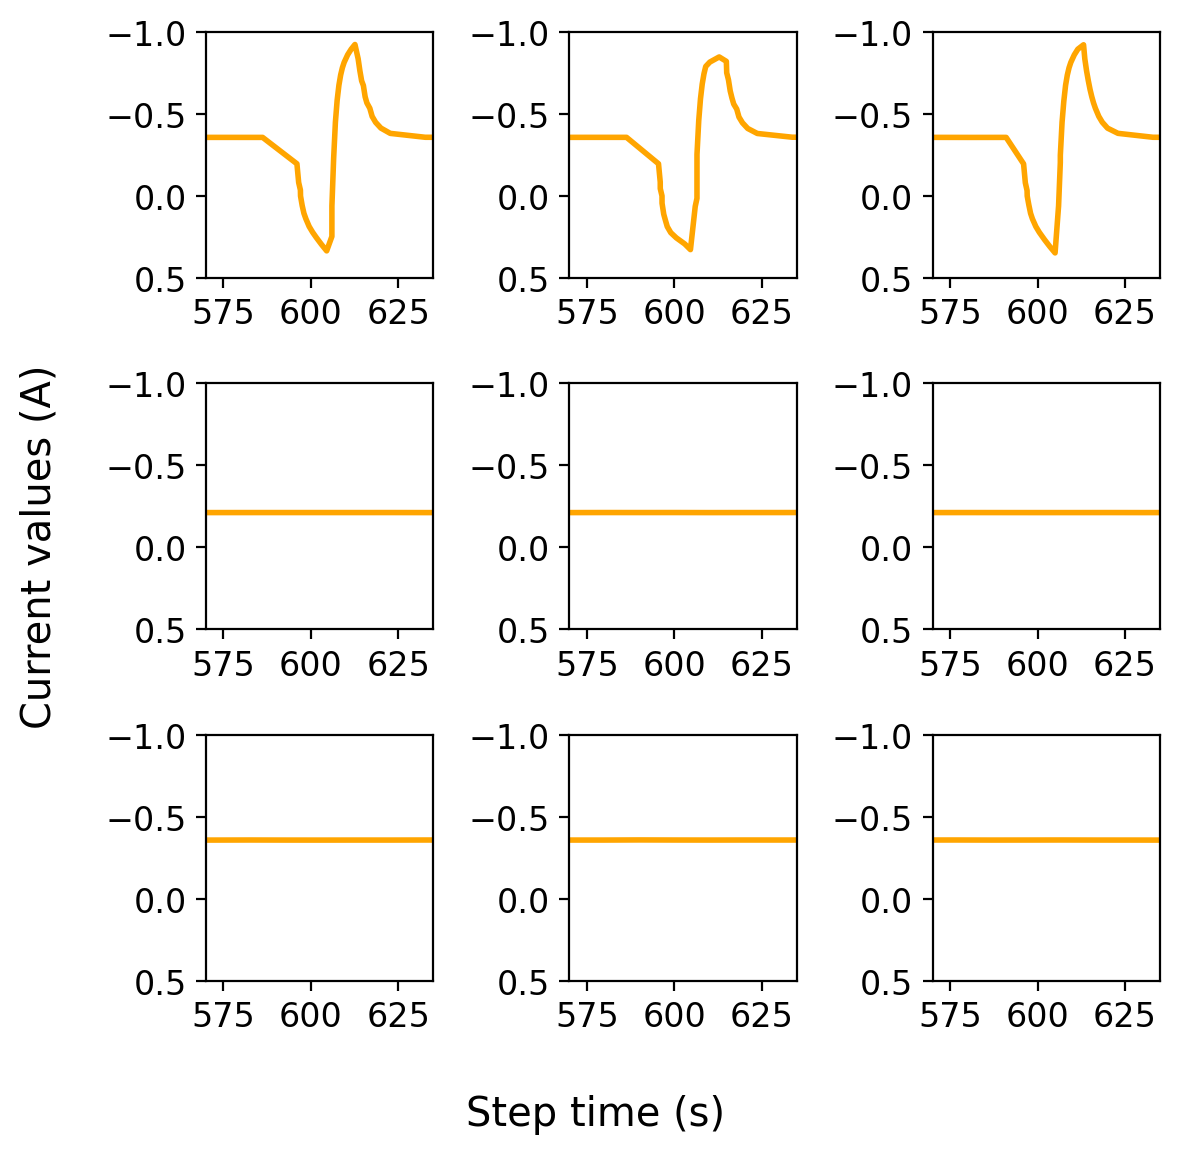

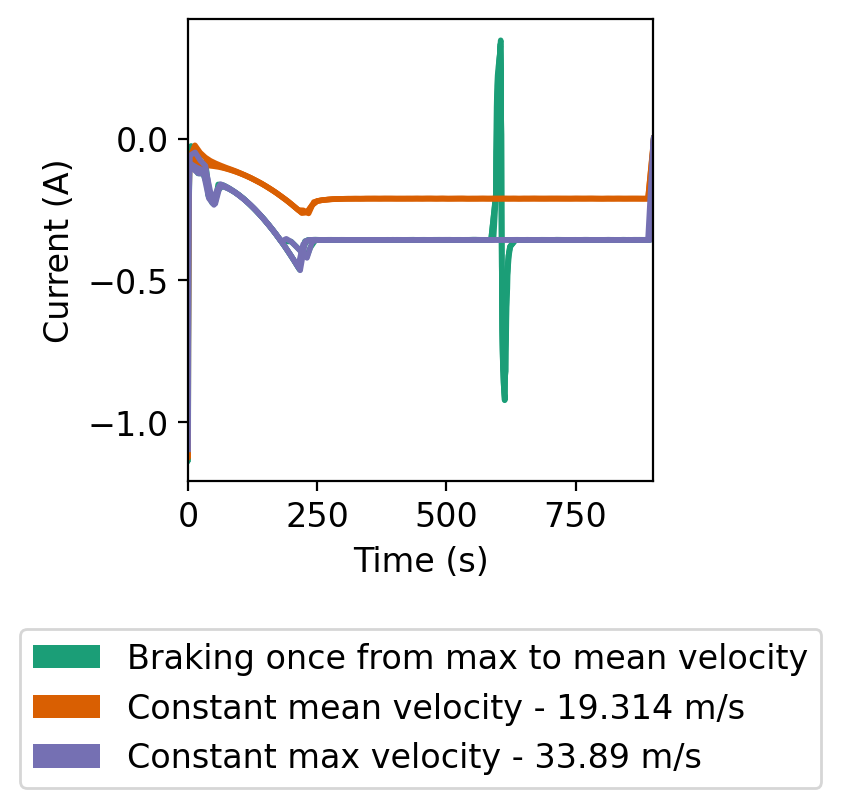

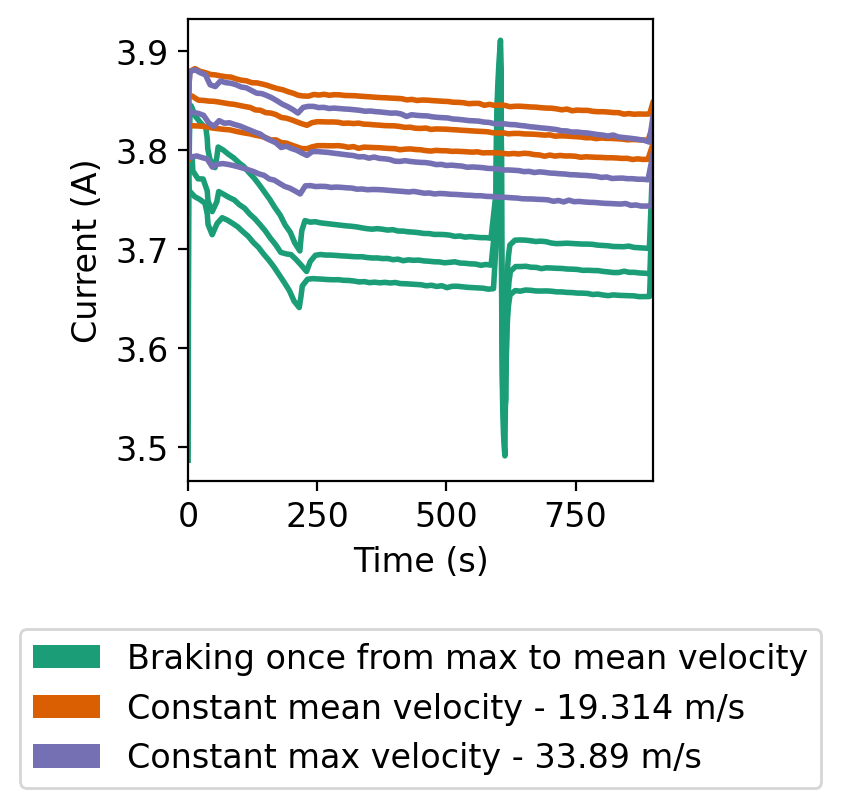

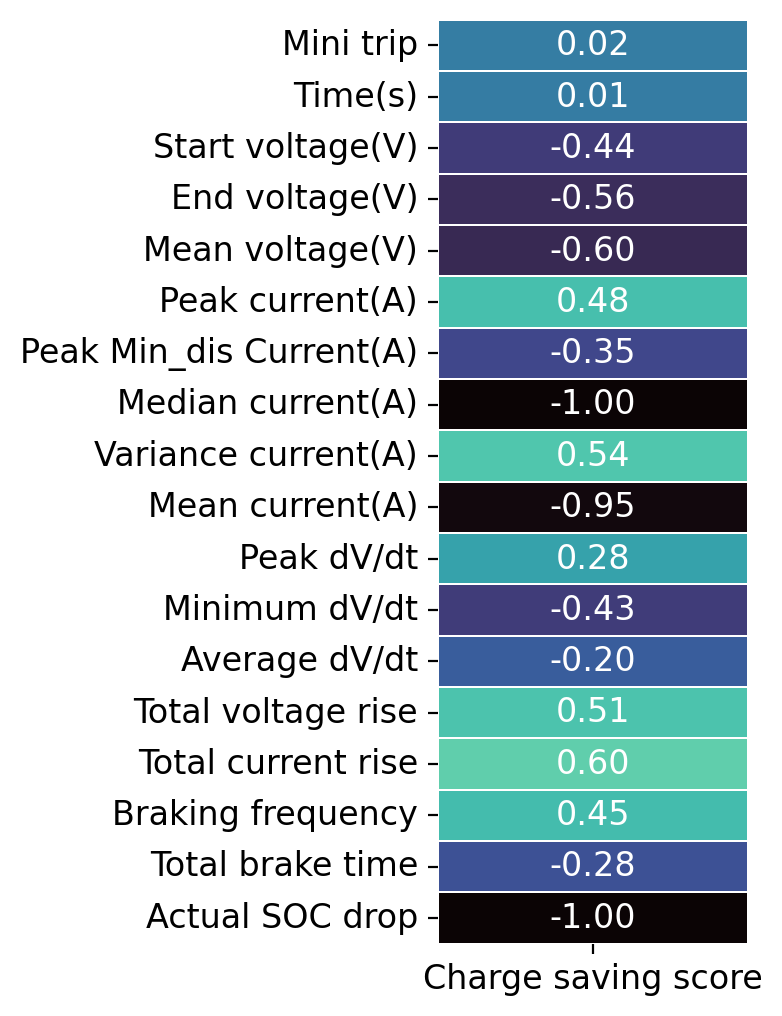

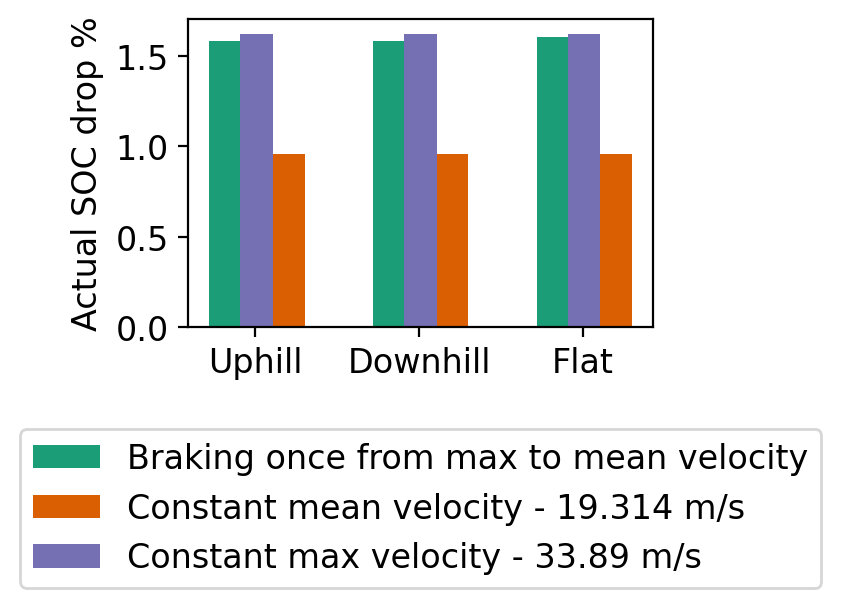

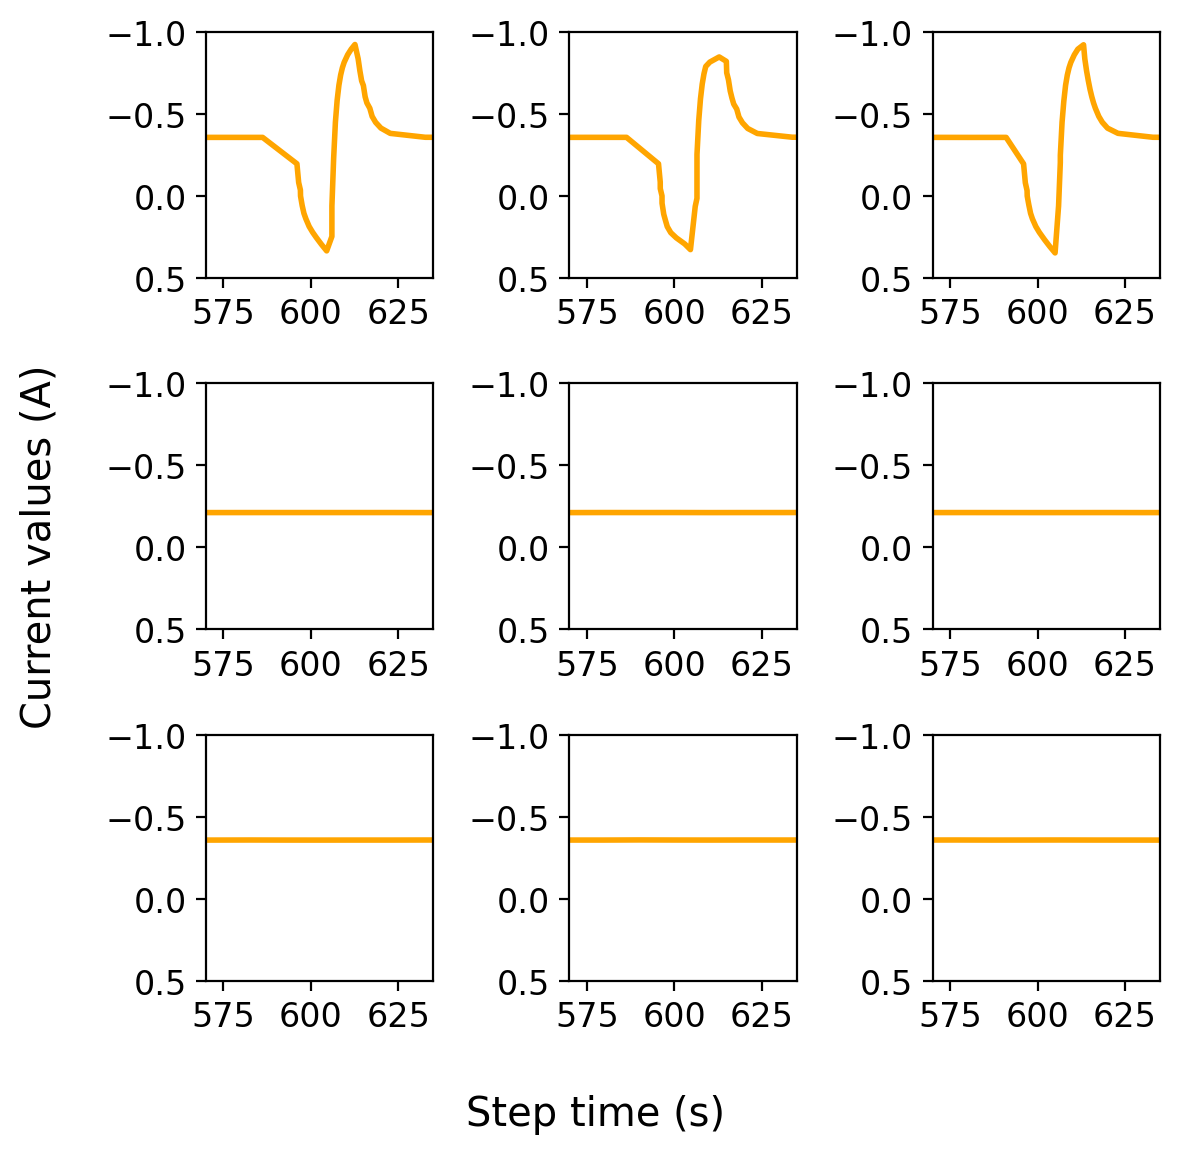

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_90501/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_90501/32172

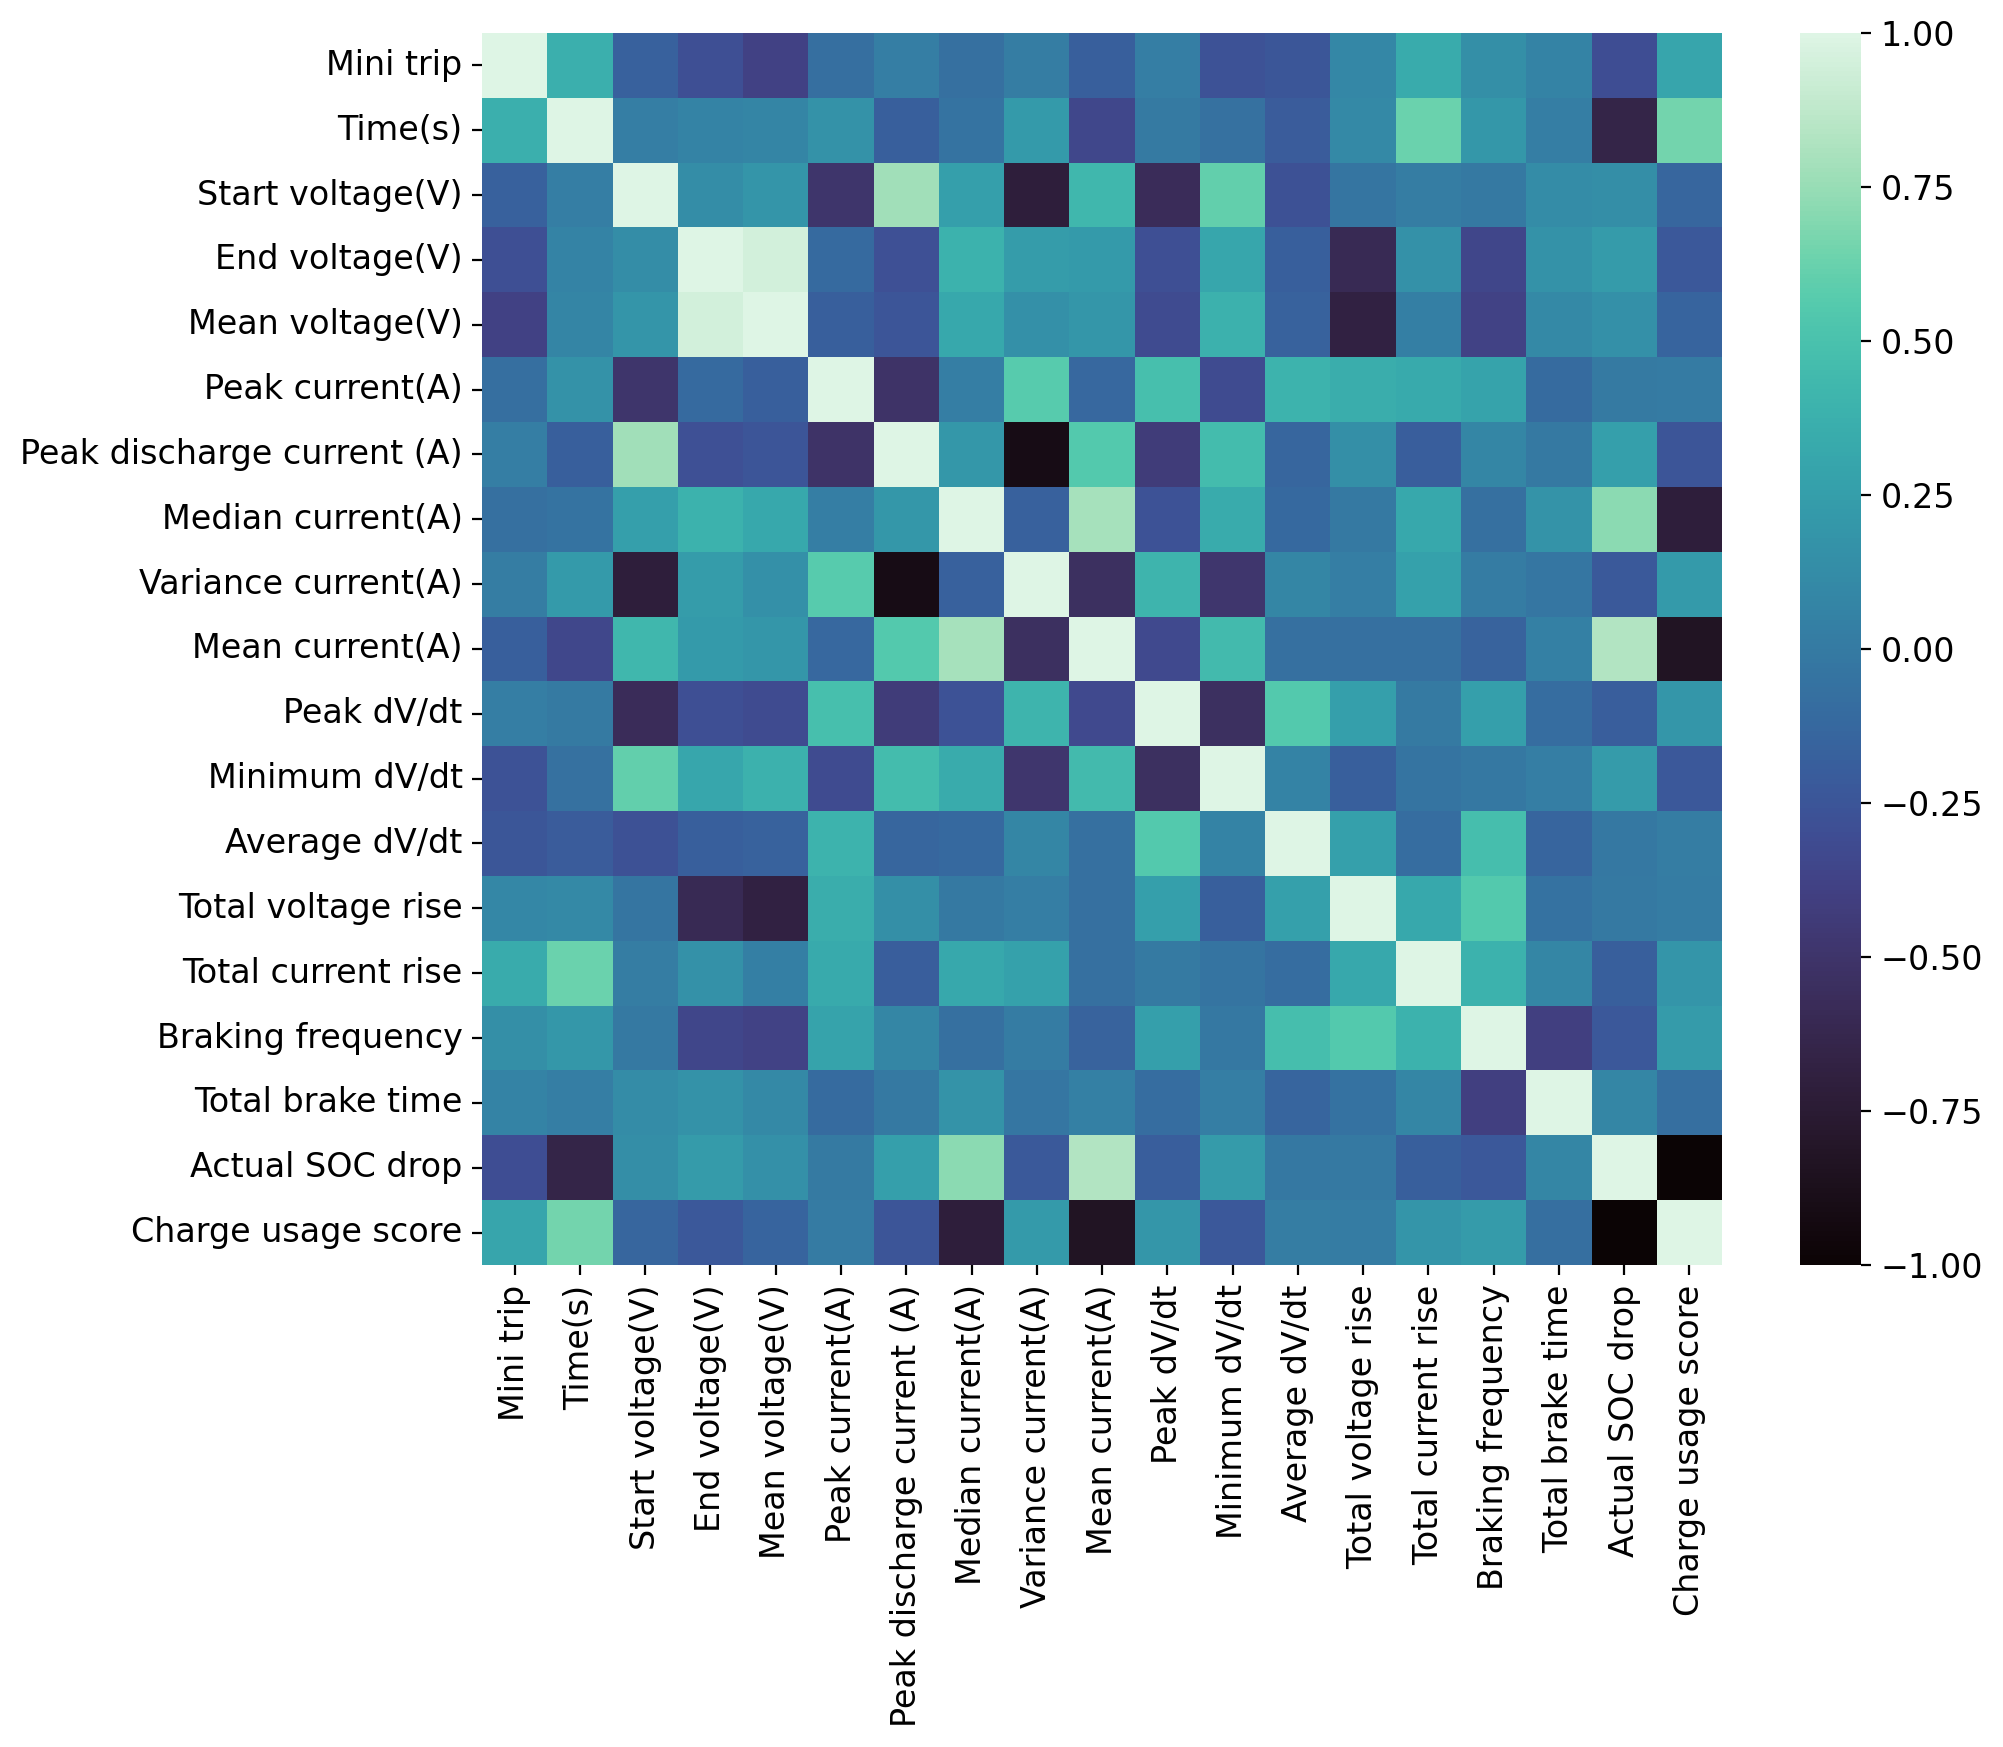

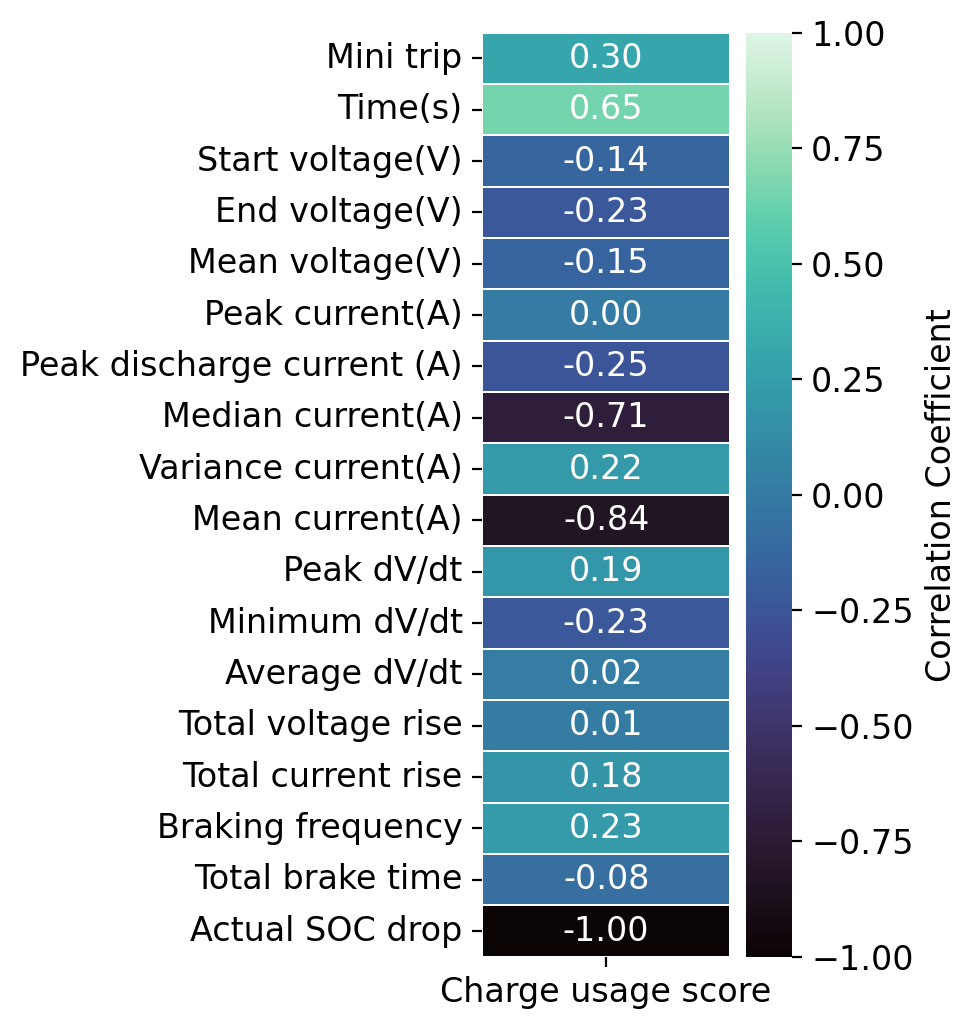

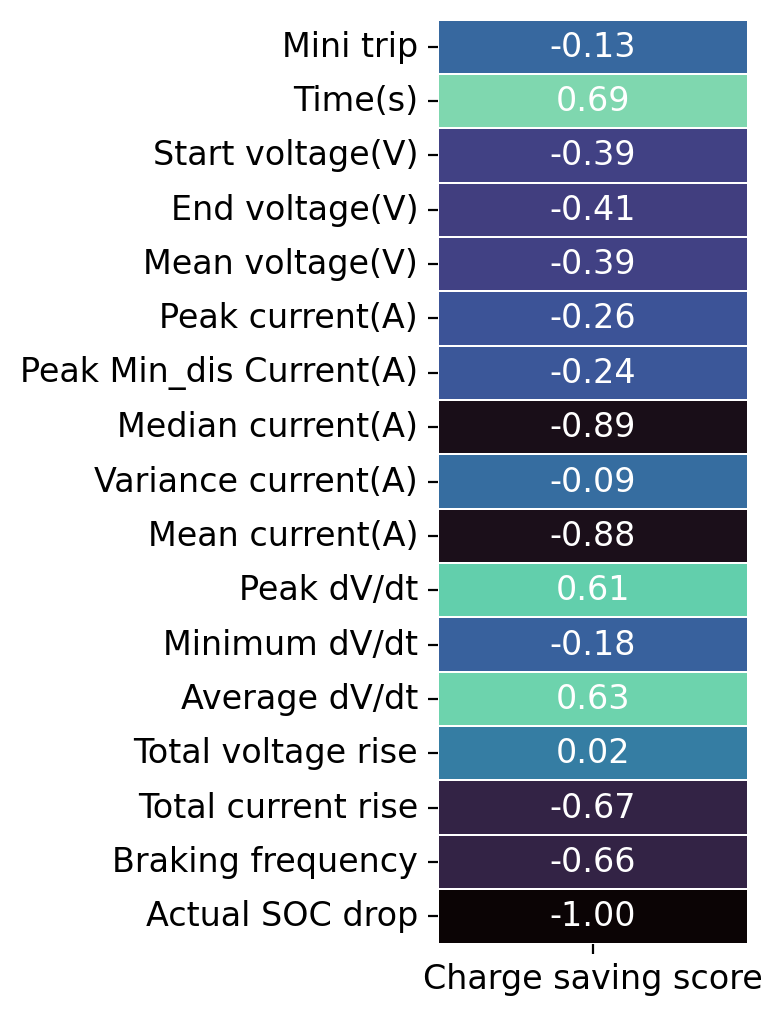

In [4]:
%run {TRAIN_DATA_NB}
%run {TEST_DATA_NB}

In [5]:
merged_info_data = pd.concat([info_data_2, info_data_test], ignore_index=True)

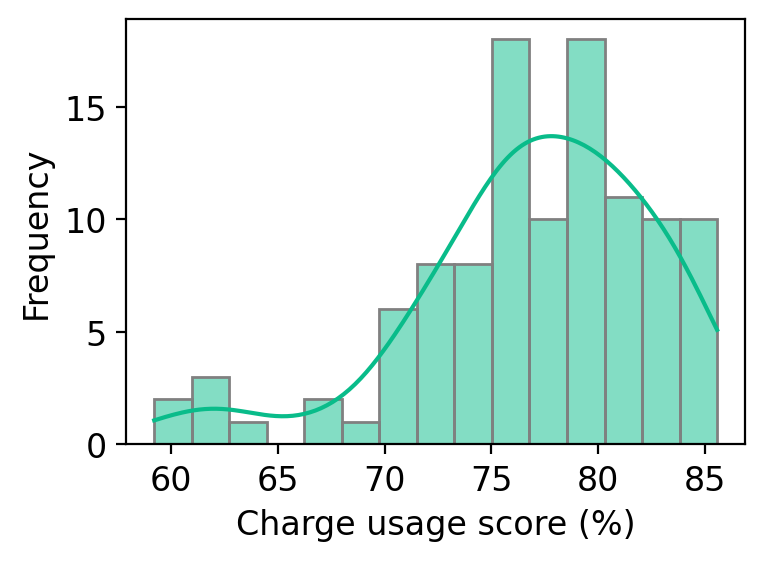

In [6]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4, 3)
colors = sns.color_palette("mako", as_cmap=True)

sns.histplot(data=merged_info_data, x=merged_info_data["Relative_SOC_drop"], bins=15, kde=True, color='#09bc8a', edgecolor='grey')

plt.xlabel('Charge usage score (%)')
plt.ylabel('Frequency')
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
# plt.savefig('/Users/hemanthnr/Desktop/batt_patt figures/charge_saving_score_distribution.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()

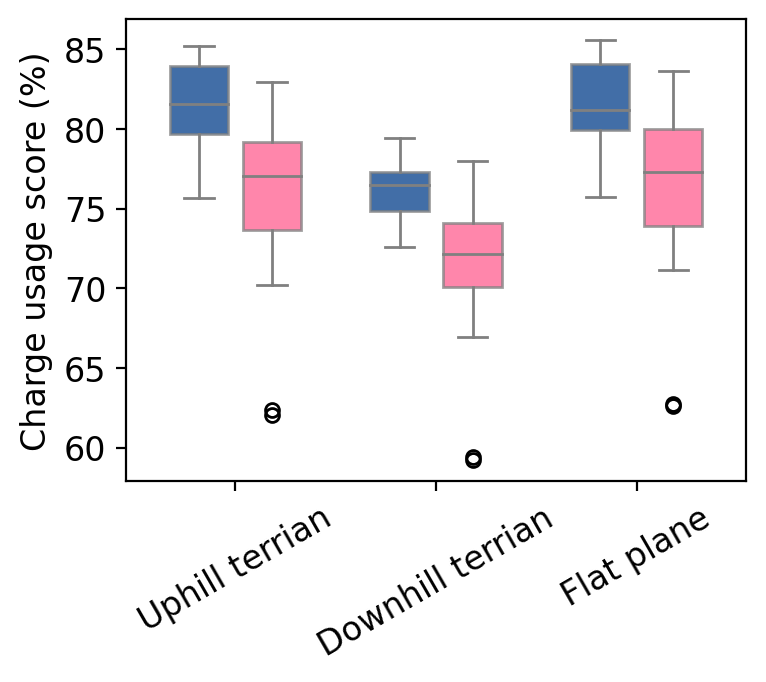

In [ ]:
classifications = ['asser_Up', 'def_Up', 'asser_Down', 'def_Down', 'asser_Flat', 'def_Flat']
soc_drop_values = {}

for classification in classifications:
    indices = data1.index[data1['Classification'] == classification].tolist()
    if indices: 
        soc_drop_values[classification] = info_data_2.loc[indices, 'Relative_SOC_drop'].values
box_plot_data = pd.DataFrame({k: pd.Series(v) for k, v in soc_drop_values.items()})


sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
positions = [1.5, 2.5, 4.25, 5.25, 7, 8]
widths = [0.8] * len(classifications)

box = ax.boxplot(box_plot_data, positions=positions, widths=widths, patch_artist=True)
colors = ['#023e8a', '#ff5d8f', '#023e8a', '#ff5d8f', '#023e8a', '#ff5d8f']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('grey')
    patch.set_alpha(0.75)
    
for whisker in box['whiskers']:
    whisker.set_color('grey')

for cap in box['caps']:
    cap.set_color('grey')

for median in box['medians']:
    median.set_color('grey')

for flier in box['fliers']:
    flier.set(marker='o', color='grey', alpha=1, markersize=5)

ax.set_ylabel('Charge usage score (%)')
ax.set_xlim(0.5, 9)
ax.set_xticks([2, 4.75, 7.5])
ax.set_xticklabels(['Uphill terrian', 'Downhill terrian', 'Flat plane'])
ax.tick_params(axis='x', labelrotation=30)


# plt.savefig(PLOT_DIR \ 'classification_1.png', format='png', dpi=1000)
plt.show()

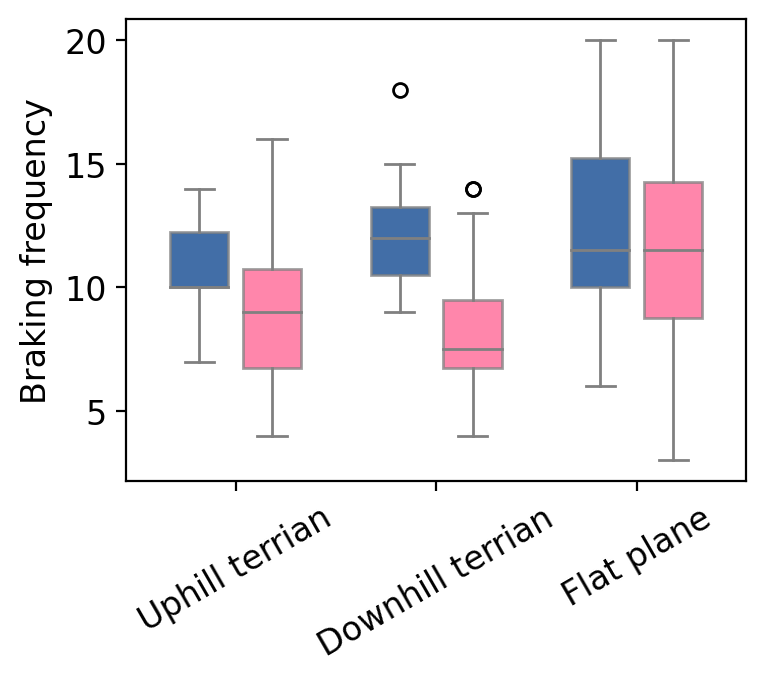

In [8]:
classifications = ['asser_Up', 'def_Up', 'asser_Down', 'def_Down', 'asser_Flat', 'def_Flat']
soc_drop_values = {}

for classification in classifications:
    indices = data1.index[data1['Classification'] == classification].tolist()
    if indices:
        soc_drop_values[classification] = info_data_2.loc[indices, 'Number of brakes'].values
box_plot_data = pd.DataFrame({k: pd.Series(v) for k, v in soc_drop_values.items()})

sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
positions = [1.5, 2.5, 4.25, 5.25, 7, 8]
widths = [0.8] * len(classifications)

box = ax.boxplot(box_plot_data, positions=positions, widths=widths, patch_artist=True)
colors = ['#023e8a', '#ff5d8f', '#023e8a', '#ff5d8f', '#023e8a', '#ff5d8f']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('grey')
    patch.set_alpha(0.75)

for whisker in box['whiskers']:
    whisker.set_color('grey')

for cap in box['caps']:
    cap.set_color('grey')

for median in box['medians']:
    median.set_color('grey')

for flier in box['fliers']:
    flier.set(marker='o', color='grey', alpha=1, markersize=5)

ax.set_ylabel('Braking frequency')
ax.set_xlim(0.5, 9)
ax.set_xticks([2, 4.75, 7.5])
ax.set_xticklabels(['Uphill terrian', 'Downhill terrian', 'Flat plane'])
ax.tick_params(axis='x', labelrotation=30)
##plt.savefig('plots\classification_1.png', format='png', dpi=1000)
plt.show()

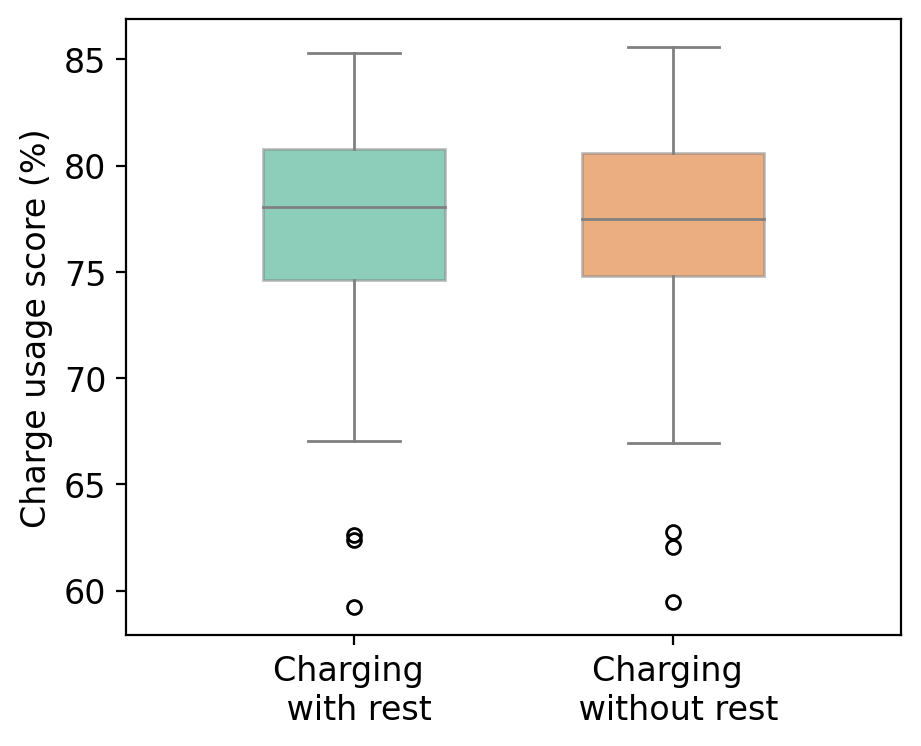

In [15]:
methods = [1, 2]
soc_drop_values = {}

for method in methods:
    indices = data1.index[data1['Method'] == method].tolist()
    if indices:
        soc_drop_values[method] = info_data_2.loc[indices, 'Relative_SOC_drop'].values
box_plot_data = pd.DataFrame({k: pd.Series(v) for k, v in soc_drop_values.items()})

sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(5, 4))
colors = sns.color_palette("Dark2", 2) 
positions = [3, 6.5]
widths = [2] * len(methods)
box = ax.boxplot(box_plot_data, positions=positions, widths=widths, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('grey')
    patch.set_alpha(0.5)

for whisker in box['whiskers']:
    whisker.set_color('grey')

for cap in box['caps']:
    cap.set_color('grey')

for median in box['medians']:
    median.set_color('grey')

for flier in box['fliers']:
    flier.set(marker='o', color='grey', alpha=1, markersize=5)

ax.set_ylabel('Charge usage score (%)')
ax.set_xlim(0.5, 9)
ax.set_xticks([3, 6.5])
ax.set_xticklabels(['Charging \n with rest', 'Charging \n without rest'])
# plt.savefig('plots\classification_2.png', format='png', dpi=1000)
plt.show()

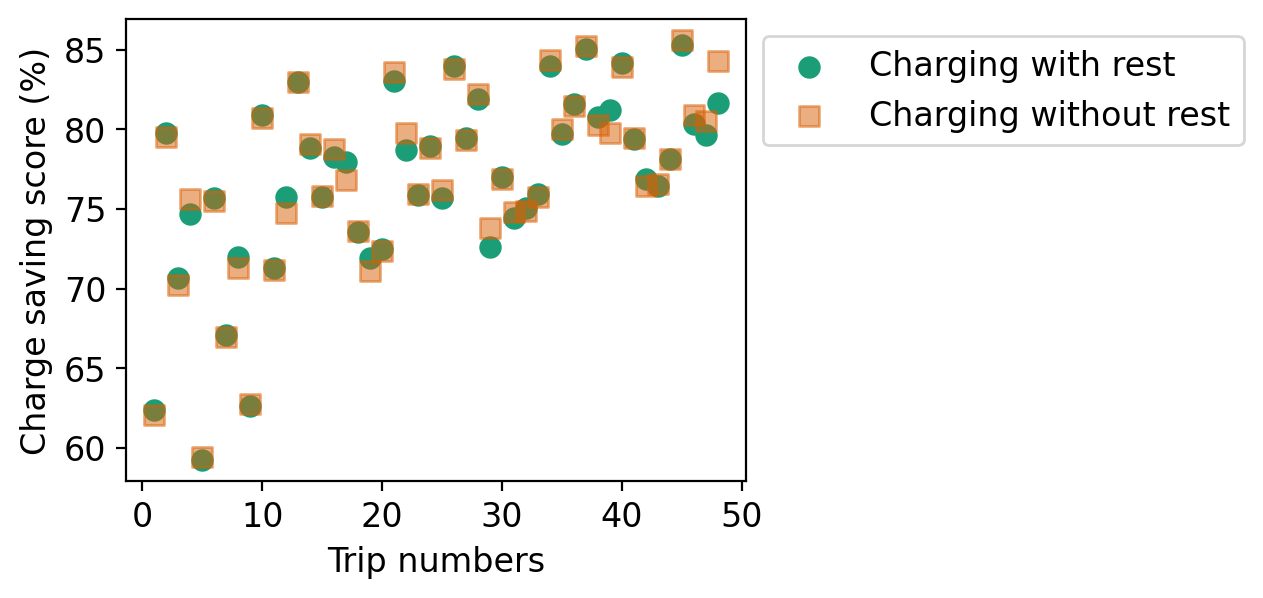

In [10]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette("Dark2", 2) 

y_val= info_data_2['Relative_SOC_drop']
x_val = info_data_2['Mini Trip']


scatter1 = plt.scatter(x_val[x_val < 49], y_val[x_val < 49], 
                       color=colors[0], label='Charging with rest', s = 50)
scatter2 = plt.scatter(x_val[x_val > 48] - 48, y_val[x_val > 48], 
                       color=colors[1], label='Charging without rest', marker='s', s = 50, alpha=0.5)

plt.xlabel('Trip numbers')
plt.ylabel('Charge saving score (%)')
plt.legend(handles=[scatter1, scatter2], loc='upper left',  bbox_to_anchor=(1,1))
plt.show()

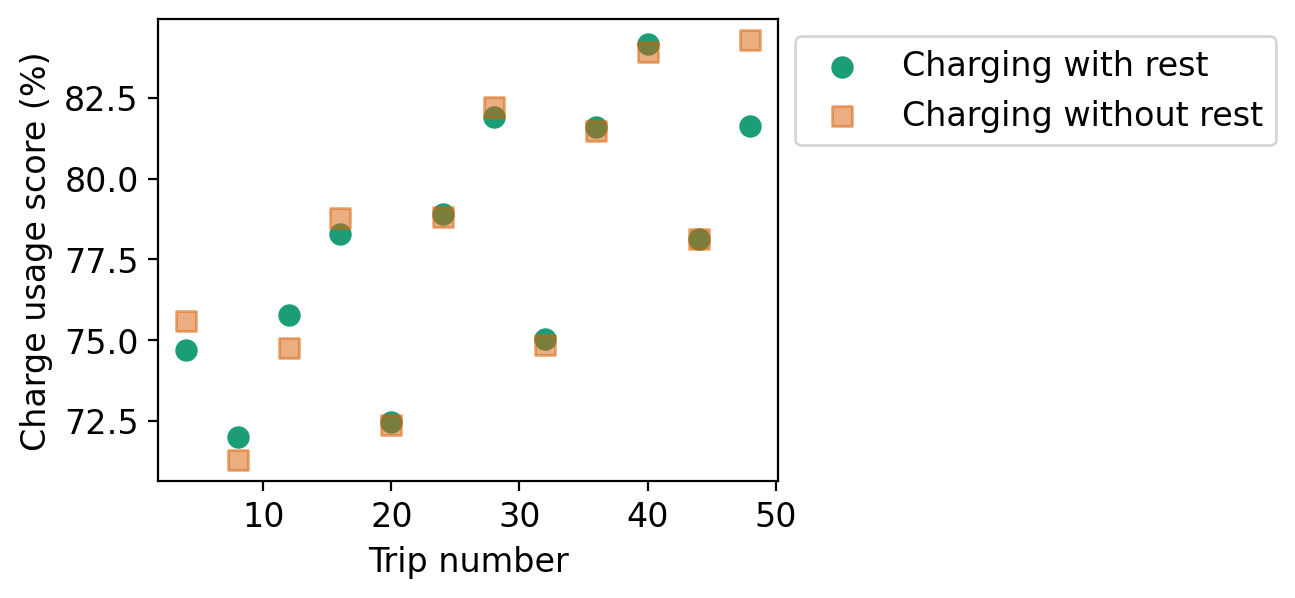

In [11]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette("Dark2", 2) 

y_val = info_data_2['Relative_SOC_drop']
x_val = info_data_2['Mini Trip']
dr = data1['Driver']

filtered = dr % 4 == 0
scatter1 = plt.scatter(x_val[(x_val < 49) & filtered], 
                       y_val[(x_val < 49) & filtered], 
                       color=colors[0], label='Charging with rest', s = 50)

scatter2 = plt.scatter(x_val[(x_val > 48) & filtered] - 48, 
                       y_val[(x_val > 48) & filtered], 
                       color=colors[1], label='Charging without rest', marker='s', s = 50, alpha=0.5)

plt.xlabel('Trip number')
plt.ylabel('Charge usage score (%)')
# plt.title('Driver 4- Relative SOC Drop comparison for Method 1 (with Rest and Charge) and Method 2 (Continuous)')
plt.legend(handles=[scatter1, scatter2], loc='upper left',  bbox_to_anchor=(1,1))
plt.show()

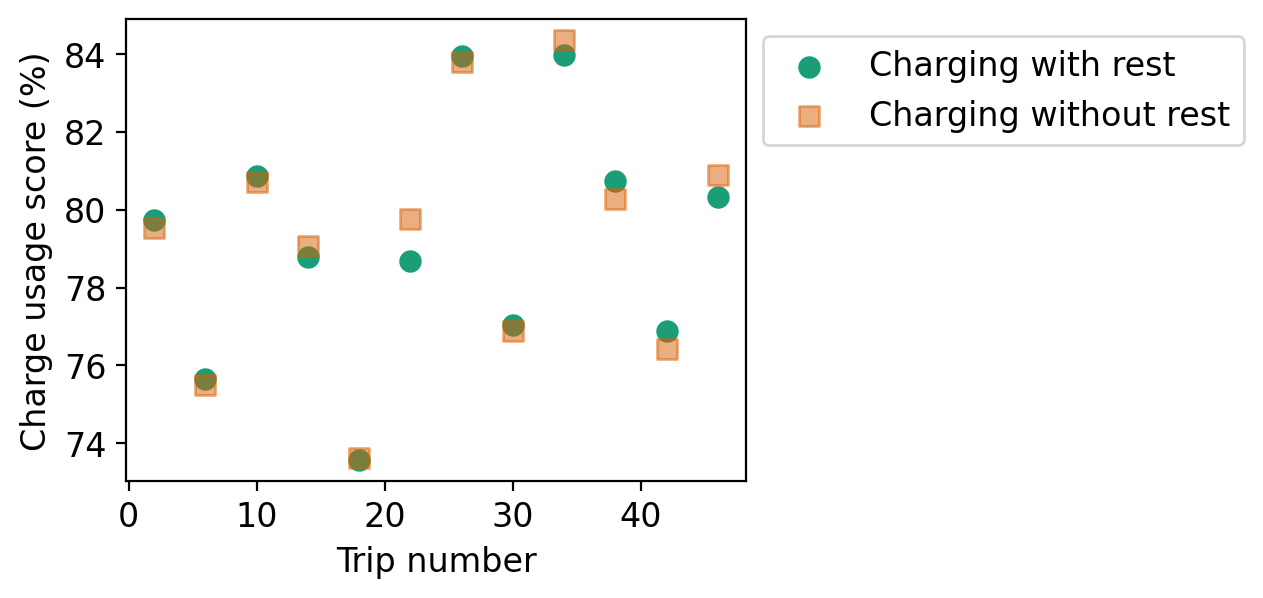

In [12]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette("Dark2", 2) 

y_val= info_data_2['Relative_SOC_drop']
x_val = info_data_2['Mini Trip']
dr= data1['Driver']
filtered = (dr % 2 == 0) & (dr % 4 != 0)
scatter1 = plt.scatter(x_val[(x_val < 49) & filtered], 
                       y_val[(x_val < 49) & filtered], 
                       color=colors[0], label='Charging with rest', s = 50)

scatter2 = plt.scatter(x_val[(x_val > 48) & filtered] - 48, 
                       y_val[(x_val > 48) & filtered], 
                        color=colors[1], label='Charging without rest', marker='s', s = 50, alpha=0.5)

plt.xlabel('Trip number')
plt.ylabel('Charge usage score (%)')
# plt.title('Driver 2- Relative SOC Drop comparison for Method 1 (with Rest and Charge) and Method 2 (Continuous)')
plt.legend(handles=[scatter1, scatter2],  loc='upper left',  bbox_to_anchor=(1,1))
plt.show()

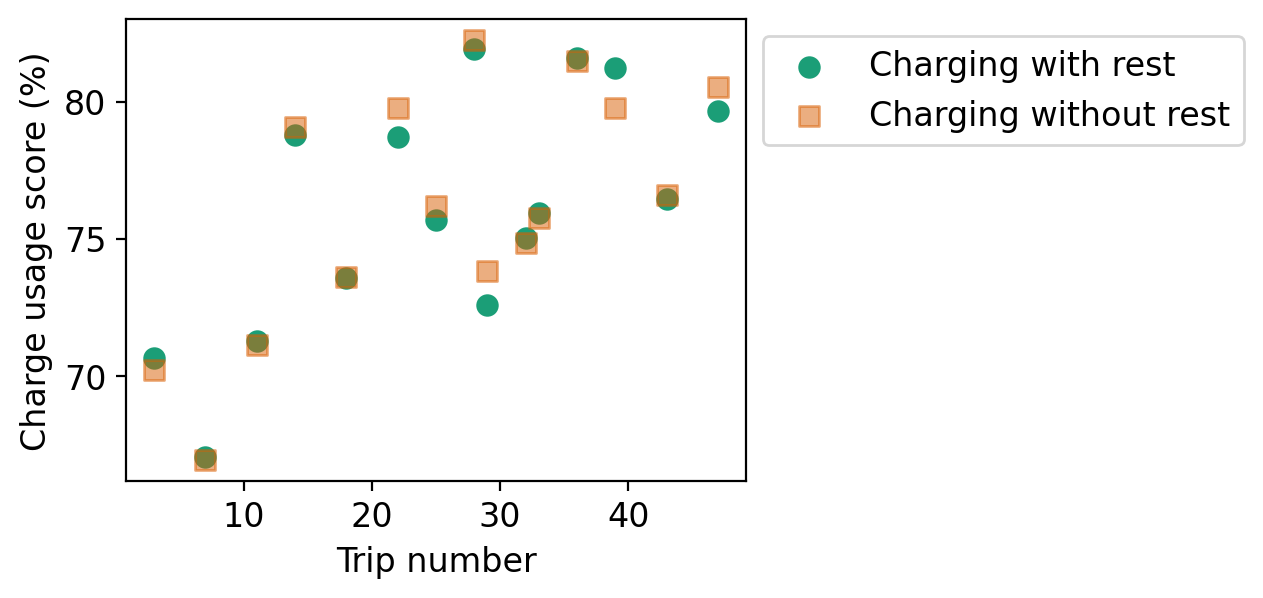

In [13]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette("Dark2", 2) 

y_val= info_data_2['Relative_SOC_drop']
x_val = info_data_2['Mini Trip']
dr= data1['Driver']
for m in range (len(x_val)):
    if dr[m]%3==0:
        if x_val[m]<49:
            scatter1 = plt.scatter(x_val[m], y_val[m],  color=colors[0], label='Charging with rest', s = 50)
        if x_val[m]>48:
            scatter2 = plt.scatter(x_val[m]-48, y_val[m],  color=colors[1], label='Charging without rest', marker='s', s = 50, alpha=0.5)
            
# plt.title('Driver 3- Relative SOC Drop comparison for Method 1 (with Rest and Charge) and Method 2 (Continuous)')
plt.xlabel('Trip number')
plt.ylabel('Charge usage score (%)')
plt.legend(handles=[scatter1, scatter2],  loc='upper left',  bbox_to_anchor=(1,1))
plt.show()

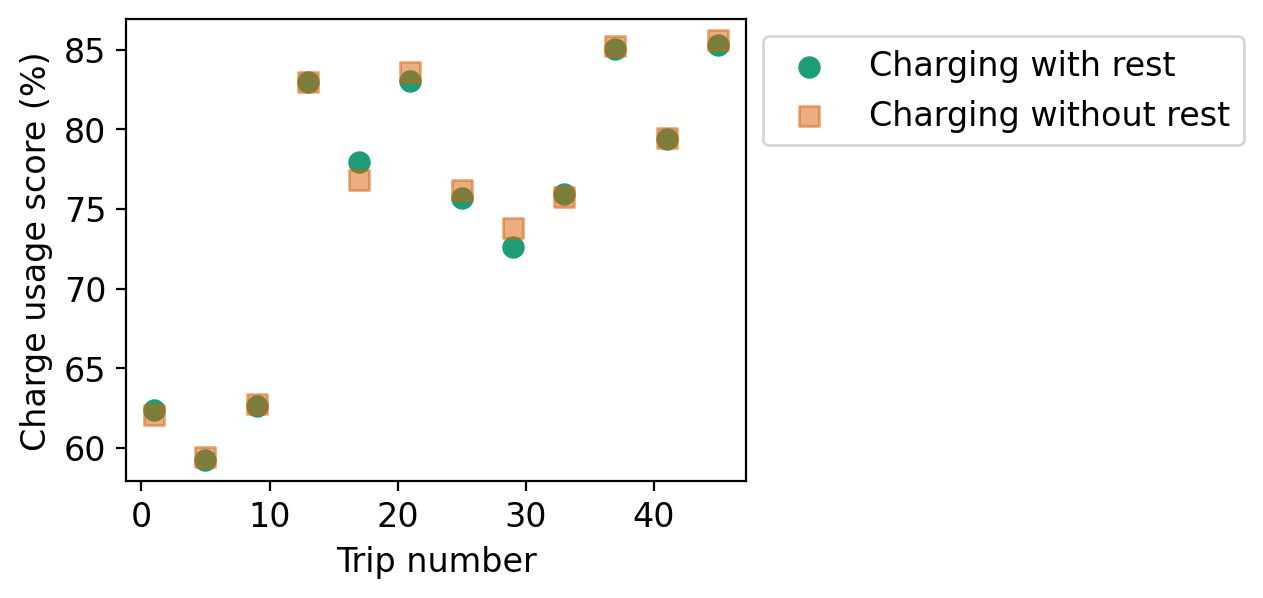

In [14]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette("Dark2", 2) 

y_val= info_data_2['Relative_SOC_drop']
x_val = info_data_2['Mini Trip']
dr= data1['Driver']
for m in range (len(x_val)):
    if dr[m]%4==1:
        if x_val[m]<49:
            scatter1 = plt.scatter(x_val[m], y_val[m],  color=colors[0], label='Charging with rest', s = 50)
        if x_val[m]>48:
            scatter2 = plt.scatter(x_val[m]-48, y_val[m],  color=colors[1], label='Charging without rest', marker='s', s = 50, alpha=0.5)
# plt.title('Driver 1- Relative SOC Drop comparison for Method 1 (with Rest and Charge) and Method 2 (Continuous)')
plt.xlabel('Trip number')
plt.ylabel('Charge usage score (%)')
plt.legend(handles=[scatter1, scatter2],  loc='upper left',  bbox_to_anchor=(1,1))
plt.show()